In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
salary_data = pd.read_csv('salary_data_states.csv')

# General Data Exploration

In [11]:
print(salary_data.columns)

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION',
       'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS',
       'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP',
       'order'],
      dtype='object')


In [12]:
different_occupation = salary_data["JOB_TITLE"].unique()
print(f"There are {len(different_occupation)} unique job titles.")


There are 12589 unique job titles.


In [13]:
different_states = salary_data["WORK_STATE"].unique()
print(different_states)

['Illinois' 'California' 'Texas' 'Oregon' 'New Jersey' 'New York'
 'Connecticut' 'Washington' 'Maryland' 'North Carolina'
 'District of Columbia' 'South Carolina' 'Rhode Island' 'Colorado'
 'Michigan' 'Missouri' 'Minnesota' 'Wyoming' 'Louisiana' 'Pennsylvania'
 'Tennessee' 'Idaho' 'Massachusetts' 'Nebraska' 'Georgia' 'Ohio' 'Florida'
 'Indiana' 'Arizona' 'Kentucky' 'Iowa' 'Wisconsin' 'Alabama' 'Arkansas'
 'Virginia' 'New Mexico' 'West Virginia' 'Oklahoma' 'Utah' 'Nevada'
 'Mississippi' 'New Hampshire' 'Delaware' 'Kansas' 'Alaska' 'Hawaii'
 'Vermont' 'North Dakota' 'Maine' 'Montana' 'Virgin Islands'
 'South Dakota' 'Guam' 'Puerto Rico' 'Palau' 'Guamam'
 'Northern Mariana Islands']


## Data Analyst Salary 

### States with the Highest Paying Salary for Data Analytics

In [14]:
data_analyst_jobs = salary_data[salary_data["JOB_TITLE"]=="Data Analyst"]
print(data_analyst_jobs)

          CASE_NUMBER        CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
2496    A-14163-77527  certified-expired           7/3/2014     12/1/2014   
11584   A-14129-67921  certified-expired          6/10/2014    10/31/2014   
20666   A-14129-68149  certified-expired           6/6/2014    10/30/2014   
24661   A-14198-89820          certified          7/18/2014     1/30/2015   
24662   A-14199-90008  certified-expired          7/18/2014    12/17/2014   
24663   A-14209-92835  certified-expired          7/28/2014    12/24/2014   
24664   A-14226-98456          certified          8/14/2014     1/13/2015   
24665   A-14288-15961          certified         10/15/2014     3/10/2015   
24666   A-14296-18610          certified         10/24/2014     4/13/2015   
24667   A-14298-19383          certified         10/25/2014     3/19/2015   
33225   A-14245-03138          certified           9/9/2014      2/3/2015   
41250   A-14294-17524          certified         10/21/2014     3/19/2015   

In [15]:


data_analyst_jobs = salary_data[salary_data['JOB_TITLE'] == 'Data Analyst']

highest_data_analyst_salary = data_analyst_jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_data_analyst_salary)

WORK_STATE
California        150000.0
North Carolina    105477.0
New Jersey        103500.0
Delaware          100589.0
Ohio               95722.0
New York           94000.0
Michigan           90000.0
Washington         87547.0
Maryland           85100.0
Virginia           80000.0
Connecticut        78000.0
Massachusetts      72155.0
Texas              56680.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


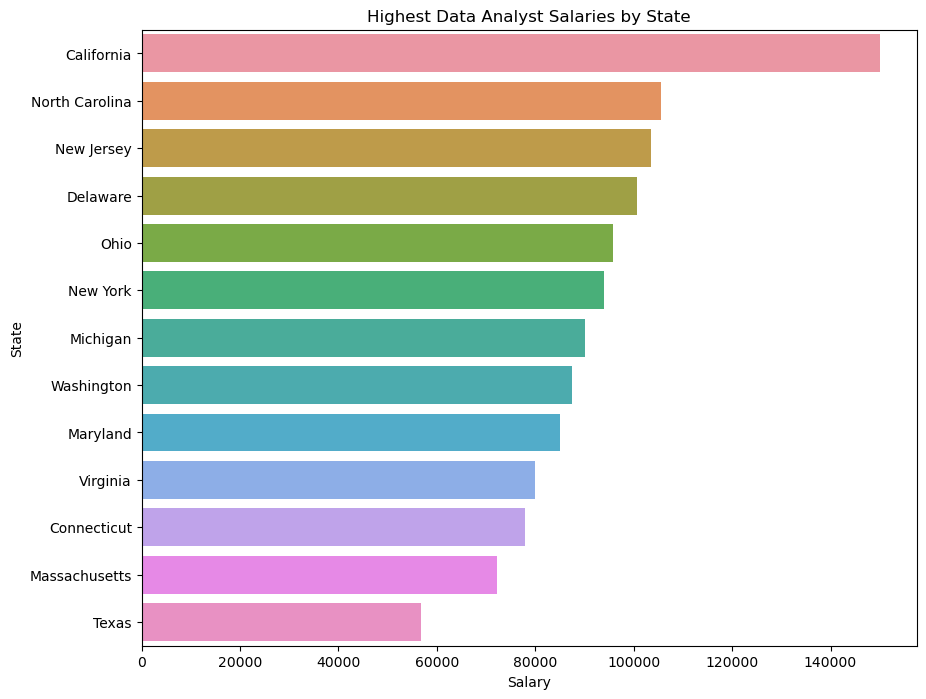

In [17]:
# Create a bar plot
plt.figure(figsize=(10,8))
sns.barplot(x=highest_data_analyst_salary.values, y=highest_data_analyst_salary.index)
plt.xlabel('Salary')
plt.ylabel('State')
plt.title('Highest Data Analyst Salaries by State')
plt.show()

#### Analysis
The chart demonstrates that among the above 13 states, California has the highest average salary for data analyst position with a salary of 150,000. This finding is consistent with the fact that San Francisco is widely recognized as a prominent "Tech Hub", suggesting that a high concentration of tech related jobs in Califoria may contribute to its top ranking. North Carolina and New Jersey follow in second and third place with an average salary of 105,477.0 and 103,500.0 respectively. 

To gain additioanl insight, our next steps will be to identify which city within California offers the highest compensation for data analyst position. This analysis will further help us understand salary dynamics in the state's thriving tech industry. 

### Cities in California with the Highest Salary 

In [19]:
data_analyst_jobs_CA = data_analyst_jobs[(data_analyst_jobs['WORK_STATE'] == 'California')]

Highest_salaries_CA = data_analyst_jobs_CA.groupby('WORK_CITY')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(Highest_salaries_CA )

WORK_CITY
Mountain View    150000.0
San Francisco    125000.0
Cupertino        119600.0
Carlsbad          87000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


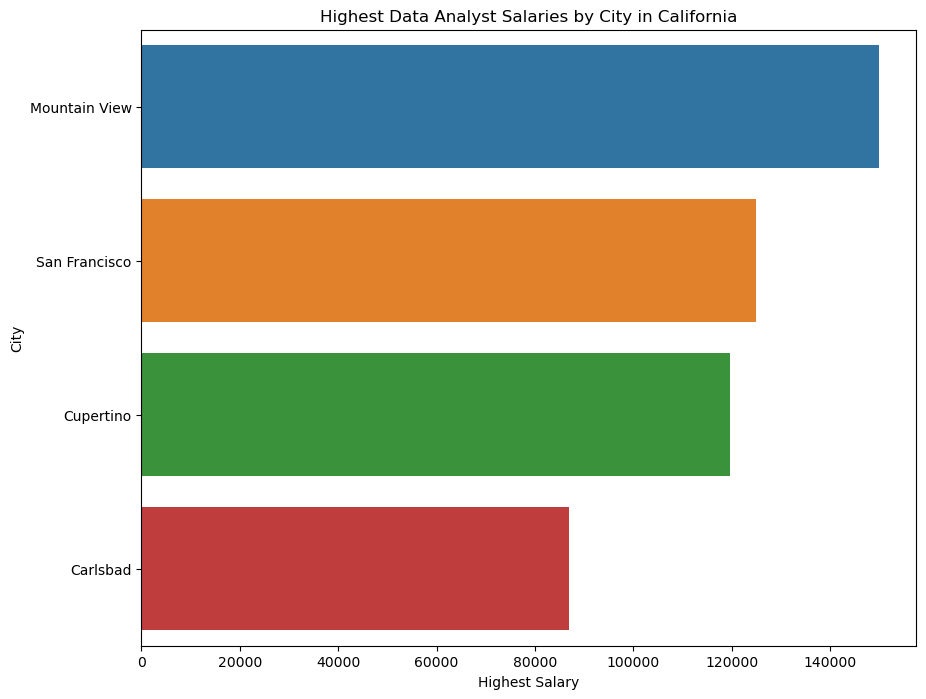

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=Highest_salaries_CA.values, y=Highest_salaries_CA.index)
plt.xlabel('Highest Salary')
plt.ylabel('City')
plt.title('Highest Data Analyst Salaries by City in California')
plt.show()


#### Analysis: 
The chart reveals that amoung the cities in California, Mountain View stand out with highest paying data analyst postion offering a salary of $150,000. Furthermore, the top three citites - Mountain View, Cupertino, and San Francisco - are all located in Northern California specifially the Bay Area. This observation underscores the prominance of the tech industry within these region which may contribute to a competative compensation package for this region. 

### Companies with the Highest Salary for Data Analyst

In [22]:
data_analyst_jobs = salary_data[salary_data['JOB_TITLE'] == 'Data Analyst']

highest_salary_by_company = data_analyst_jobs.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_salary_by_company)

EMPLOYER_NAME
QUIXEY                                150000.0
TWITTER, INC.                         125000.0
APPLE INC.                            119600.0
CYGTEC INC                            105477.0
SHIONOGI INC.                         103500.0
COVANT SOLUTIONS INC                  100589.0
ZYNGA INC.                            100000.0
CARESOURCE MANAGEMENT GROUP            95722.0
CREDIT SUISSE SECURITIES (USA) LLC     94000.0
SAGITEC SOLUTIONS LLC                  91200.0
VIGILANT TECHNOLOGIES LLC              90000.0
COMSCORE, INC.                         87547.0
MAINTENANCENET INC.                    87000.0
INOVALON, INC.                         85100.0
EPITEC, INC.                           80080.0
SAGARSOFT, INC                         78000.0
CAMSTAR SYSTEMS, INC.                  78000.0
STARPOINT SOLUTIONS LLC                72155.0
CSXPERTS LLC                           65354.0
HARVEST TRADING GROUP,INC.             60000.0
BLOOMBERG L.P.                         59000.0

#### Analysis:
The company with the highest average salary was Quixey, a mobile technology company specializing in functinal app searcg, had the highest average salary for data analyst. However its important to note that this company cease operation in Feburary of 2017. 


## Business Analyst Salary

### States with the Highest Paying Salary for Business Analytics


In [23]:

business_analyst_jobs = salary_data[salary_data['JOB_TITLE'] == 'Business Analyst']

highest_business_analyst_salary = business_analyst_jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_business_analyst_salary)


WORK_STATE
California              184683.0
Maryland                131331.0
New York                131248.0
Pennsylvania            120245.0
District of Columbia    119038.0
Virginia                114795.0
Texas                   114650.0
Massachusetts           112000.0
New Jersey              109000.0
Minnesota               107000.0
Connecticut             104998.0
Vermont                  99000.0
Illinois                 97000.0
Florida                  96117.0
Colorado                 95243.0
Arizona                  92394.0
North Carolina           92000.0
Michigan                 90064.0
Delaware                 85000.0
Iowa                     80000.0
Kansas                   78000.0
Washington               72384.0
Georgia                  66872.0
Tennessee                66414.0
Missouri                 64314.0
Oklahoma                 31741.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


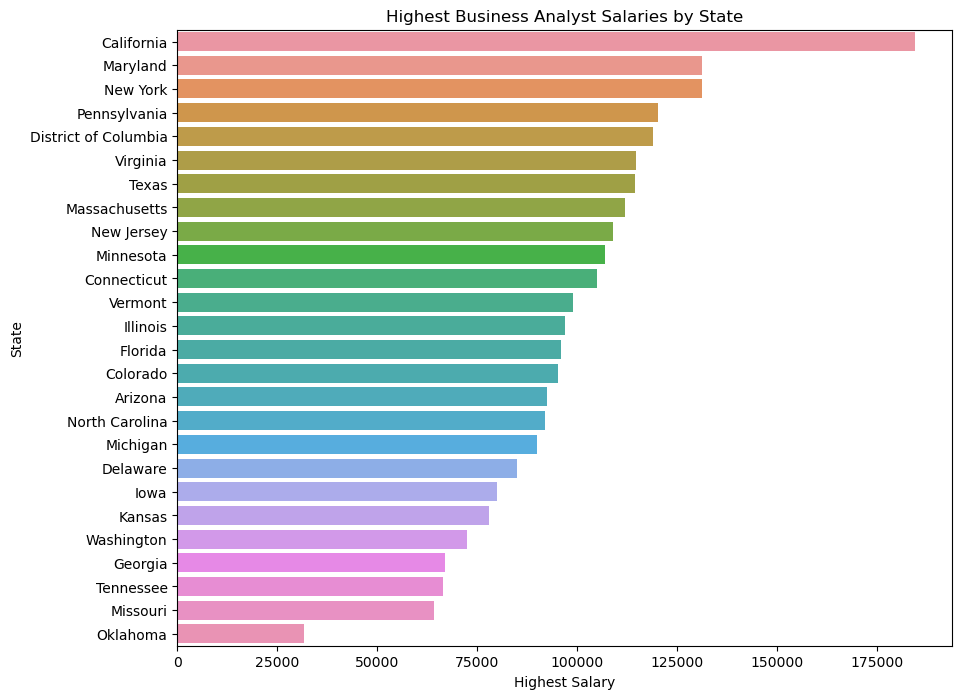

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_business_analyst_salary.values, y=highest_business_analyst_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Business Analyst Salaries by State')
plt.show()

#### Analysis:
For Business Analyst Salary, California continues to offer the highest salary of $184,683. Maryland and New York follow closely behind, each preseneting a similar salry figure around 130,000. This analysis further emphasize California dominance as the leading state for high paying opportunites in the technology sector. 


### Companies with the Highest Salary for Business Analyst


In [25]:
business_analyst_jobs = salary_data[salary_data['JOB_TITLE'] == 'Business Analyst']

highest_salary_by_company_for_business_analyst = business_analyst_jobs.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_salary_by_company_for_business_analyst)

EMPLOYER_NAME
HARA-TECH, INC.                               184683.0
TRIANZ                                        160000.0
BPA TECHNOLOGIES INC,.                        148000.0
PACIFIC INVESTMENT MANAGEMENT COMPANY, LLC    133000.0
GOOGLE INC.                                   132000.0
                                                ...   
RAM CREATIONS                                  49483.0
ACCO FOREIGN SHIPPING, INC.                    46259.0
V247 TELECOM LLC                               43000.0
ARTECH INFORMATION SYSTEMS                     37000.0
KHUSHI ENTERPRISE INC.                         31741.0
Name: PAID_WAGE_PER_YEAR, Length: 164, dtype: float64


#### Analysis:  

For a Business Analyst postion, Hara-Tech offered the highest average salary at $184,683. Intriguingly, Google, a prominent technology company, ranked only sixth in terms of the most competitive salary offerings. One might initially presume that such a leading organization would provide the highest compensation. Nevertheless, various factors, including the fierce competition in the employment landscape and the job position level, could lead to other companies offering higher pay based on the candidate's experience. Furthermore, former Google employees might have sought and secured more lucrative opportunities elsewhere.


## Data Science 

### States with the Highest Paying Salary for Data Science


In [26]:
data_science_jobs = salary_data[salary_data['JOB_TITLE'] == 'Data Scientist']

highest_data_science_salary = data_science_jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_data_science_salary)


WORK_STATE
California       145000.0
New York         114338.0
Washington       106000.0
Massachusetts     94515.0
Georgia           72000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


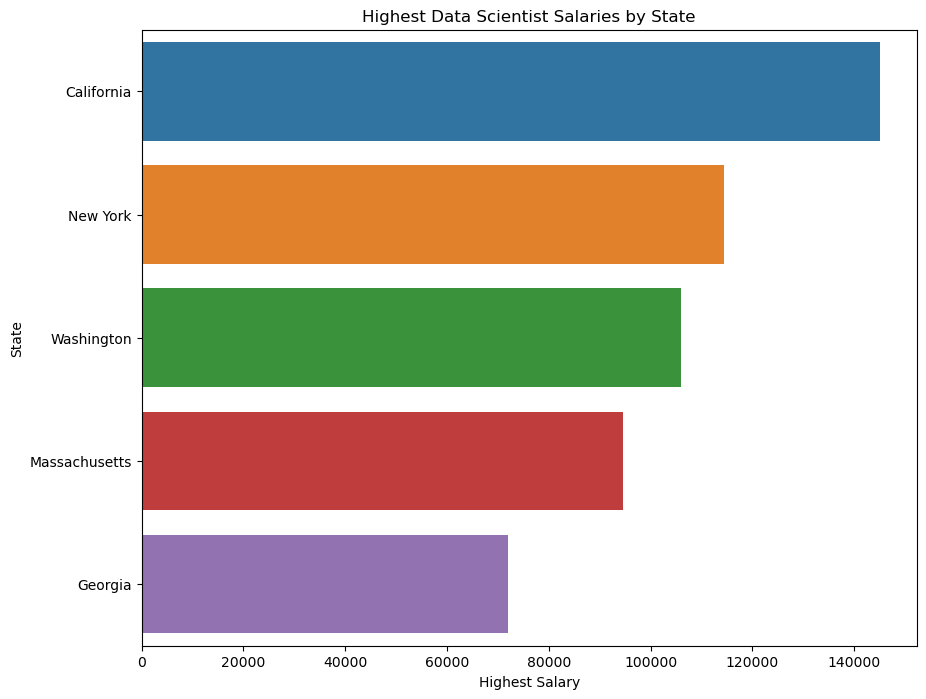

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_data_science_salary.values, y=highest_data_science_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Data Scientist Salaries by State')
plt.show()

#### Analysis: 

In the realm of data science careers, California consistently emerges as the state offering the highest remuneration, with an average salary of 145,000. New York trails closely behind, providing an average of 114,338, while Georgia lags at the bottom, offering a comparatively low salary of $72,000. Given the substantial income disparity between California and Georgia, it may be better for job seekers to explore alternative career fields, potentially beyond the technology sector.  

### Companies with the Highest Salary for Data Scientist


In [28]:
data_science_jobs = salary_data[salary_data['JOB_TITLE'] == 'Data Scientist']

highest_salary_by_company_for_data_science = data_science_jobs.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_salary_by_company_for_data_science)

EMPLOYER_NAME
RDIO, INC.              145000.0
YAHOO! INC.             140000.0
FACEBOOK, INC.          138000.0
AGILONE, INC            135000.0
INTUIT                  134638.4
SUPPLY FRAME, INC.      130000.0
CircleUp Network Inc    125000.0
LINKEDIN CORPORATION    125000.0
EBAY INC.               119000.0
MARKETWELL INC          114338.0
DROPBOX, INC.           110000.0
FIREEYE, INC.           107000.0
LITLE & CO.              94515.0
RIOT GAMES INC           86250.0
360I LLC                 72000.0
AIRSAGE, INC             69867.0
EXELATE INC.             45323.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


#### Analysis: 

Numerous companies offer competitive salary for data scientists, but with a lower salary range compared to data analytics positions. RDIO leads the list, providing an average salary of 145,000, closely followed by Yahoo at 140,000 and Facebook at $138,000. Interestingly, these top-paying organizations primarily operate within the technology sector, despite the demand for data scientists in other fields, such as healthcare. It is surprising that the list does not feature non-tech companies, given the diverse industries that employ data science professionals.

## Software Engineer 

### States with the Highest Paying Salary for Software Engineer


In [29]:
software_engineering_jobs = salary_data[salary_data['JOB_TITLE'] == 'Software Engineer']

highest_software_engineering_salary = software_engineering_jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_software_engineering_salary)

WORK_STATE
New York                237450.00
California              215984.00
Washington              195000.00
North Carolina          165000.00
Massachusetts           152500.00
New Jersey              149157.00
Texas                   148277.00
Maryland                145392.00
Missouri                133640.00
Colorado                131000.00
Illinois                130000.00
Virginia                125757.00
Utah                    120000.00
Delaware                118000.00
Arizona                 118000.00
Oregon                  114754.00
Pennsylvania            114000.00
Vermont                 106500.00
Florida                 104500.00
Georgia                 104500.00
Michigan                104000.00
Montana                 102960.00
Minnesota                99871.25
Kansas                   99403.00
Maine                    97198.00
Kentucky                 95000.00
Nevada                   93974.00
District of Columbia     89669.00
Connecticut              87901.00
Ala

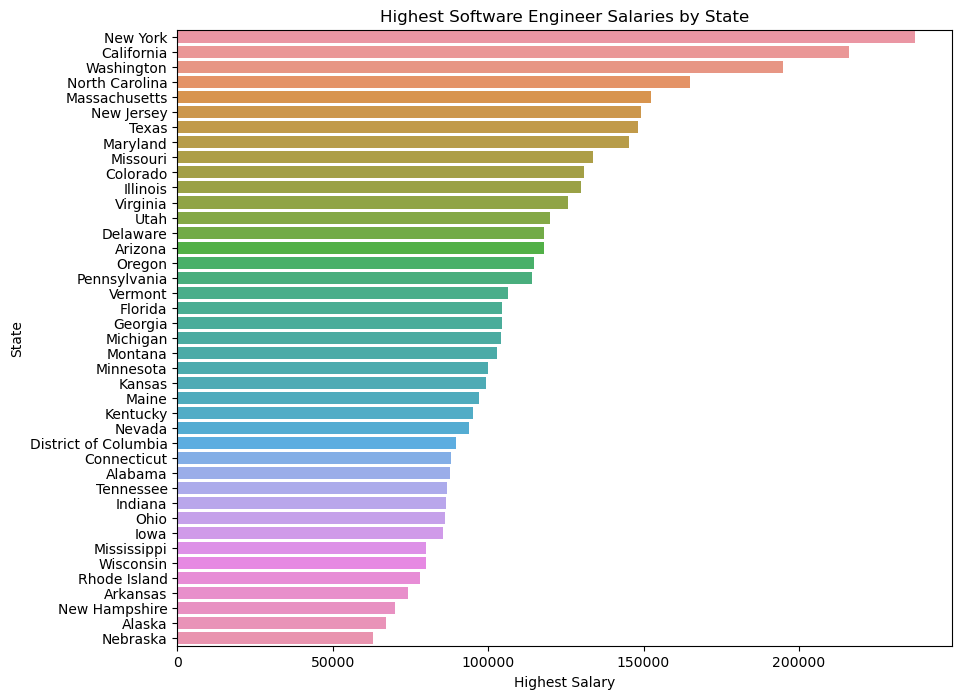

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_software_engineering_salary.values, y=highest_software_engineering_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Software Engineer Salaries by State')
plt.show()

#### Analysis: 
Among the four technology-related occupations examined, software engineering emerges as the highest-paying profession. Interestingly, New York offers the most competitive salary in this field, with an average of 237,450. This deviates from the previously observed trend of California having the highest salary for technology related positions. One possible explanation for New York's higher salary offering could be the elevated cost of living in the state, which may surpass that of California. 

### Companies with the Highest Salary for Software Engineer

In [62]:
software_engineering_jobs = salary_data[salary_data['JOB_TITLE'] == 'Software Engineer']

highest_salary_by_company_for_software_engineer = software_engineering_jobs.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_salary_by_company_for_software_engineer)


EMPLOYER_NAME
GOOGLE INC.                    237450.0
DROPBOX, INC.                  200000.0
CLOVER NETWORK, INC.           180000.0
FACEBOOK, INC.                 175000.0
NIMBLE STORAGE, INC.           165000.0
                                 ...   
UniversityTickets.com, Inc      60000.0
TOTAL DISPLAY SOLUTIONS LLC     56971.0
CADILLAC JACK                   56014.0
MANCOMM, INC.                   52000.0
ICON SYSTEMS                    49254.0
Name: PAID_WAGE_PER_YEAR, Length: 740, dtype: float64


#### Analysis: 

Google emerges as the top-paying organization for software engineers, offering a salary of 237,450. It appears that the specific job title or role influences whether Google assumes the leading position in terms of compensation. This is a logical observation, as not all positions within a company warrant high salaries; salary range will depend on the particular role one is pursuing. Consequently, aspiring employees should not exclusively target the "Big Five" tech companies, as other organizations may provide more competitive pay for roles in say a data-related positions. 

# Non - Tech Related Job Data Exploration

## Assistant Professor

### States with the Highest Paying Salary for Assistant Professor


In [64]:
assistant_professor = salary_data[salary_data['JOB_TITLE'] == 'Assistant Professor']

highest_assistant_professor_salary = assistant_professor.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_assistant_professor_salary)

WORK_STATE
Florida                 500000.00
Arkansas                350000.00
Ohio                    343815.00
West Virginia           291863.00
Alabama                 279999.96
California              260944.00
Wisconsin               249000.00
Massachusetts           247000.00
New York                220000.00
District of Columbia    210000.00
Michigan                210000.00
Georgia                 205000.00
Maryland                205000.00
Missouri                202000.00
New Mexico              198000.00
Colorado                193625.00
Washington              190000.00
Oklahoma                190000.00
Virginia                180000.00
Connecticut             172000.00
Texas                   170000.00
Louisiana               170000.00
Illinois                165000.00
Minnesota               160000.00
Indiana                 158000.00
North Carolina          150000.00
South Carolina          142000.00
New Jersey              140000.00
Arizona                 135000.00
Ten

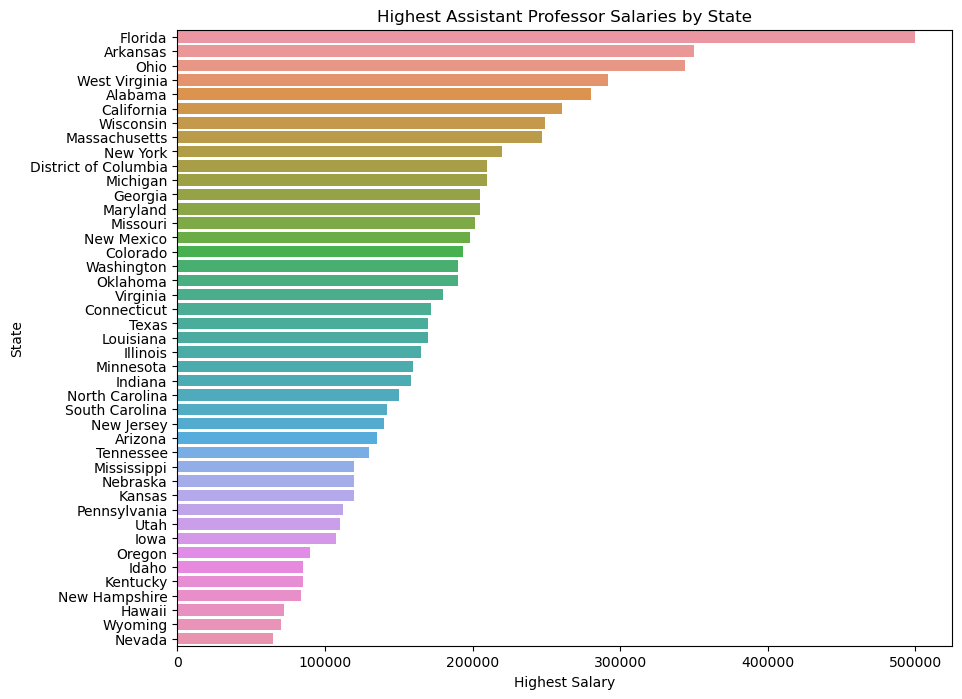

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_assistant_professor_salary.values, y=highest_assistant_professor_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Assistant Professor Salaries by State')
plt.show()

#### Analysis: 

Remarkably, Florida offers the highest salary for the position of Assistant Professor position, with a staggering 500,000 salary. Although it ranks as one of the lowest-paying states within the technology sector, it proves to be a lucrative option for non-tech positions. California continues to provide competitive compensation for this role, even exceeding the salary for many data-related jobs. These observations underscore the notion that salary potential is significantly influenced by the field of interest and location, emphasizing the importance of considering both factors when pursuing a career. 

### Employer with the Highest Salary for Assistant Professor 

In [74]:
assistant_professor = salary_data[salary_data['JOB_TITLE'] == 'Assistant Professor']

highest_assistant_professor_salary_by_employer = assistant_professor.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)

print(highest_assistant_professor_salary_by_employer)

EMPLOYER_NAME
UNIVERSITY OF FLORIDA                                 500000.00
UNIVERSITY OF ARKANSAS FOR MEDICAL SCIENCES           350000.00
CINCINNATI CHILDREN'S HOSPITAL MEDICAL CENTER         343815.00
WEST VIRGINIA UNIVERSITY                              291863.00
UNIVERSITY OF ALABAMA AT BIRMINGHAM                   279999.96
                                                        ...    
STATE UNIVERSITY OF NEW YORKCOLLEGE AT PLATTSBURGH     50500.00
UNIVERSITY OF WISCONSIN-GREEN BAY                      50000.00
RADFORD UNIVERSITY                                     50000.00
UNIVERSITY OF WISCONSIN - PLATTEVILLE                  50000.00
CENTRAL VIRGINIA COMMUNITY COLLEGE                     46169.00
Name: PAID_WAGE_PER_YEAR, Length: 224, dtype: float64


#### Analysis: 

The majority of employers offering Assistant Professor positions are universities, with the University of Florida notably providing the highest salary at $500,000. This exceptional compensation comes as a surprise, as one might not anticipate such a lucrative salary for an Assistant Professor role. However, it is plausible that as these professionals gain experience in both research and teaching, their salary increases over time.

##  Management Consultant

### States with the Highest Paying Salary for Management Consultant


In [31]:

management_consultant_jobs = salary_data[salary_data['JOB_TITLE'] == 'Management Consultant']

highest_management_consultant_salary = management_consultant_jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_management_consultant_salary)


WORK_STATE
California        140920.0
Massachusetts     117600.0
Washington        112000.0
Texas             111654.0
South Carolina     85000.0
Virginia           78083.0
Florida            56701.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


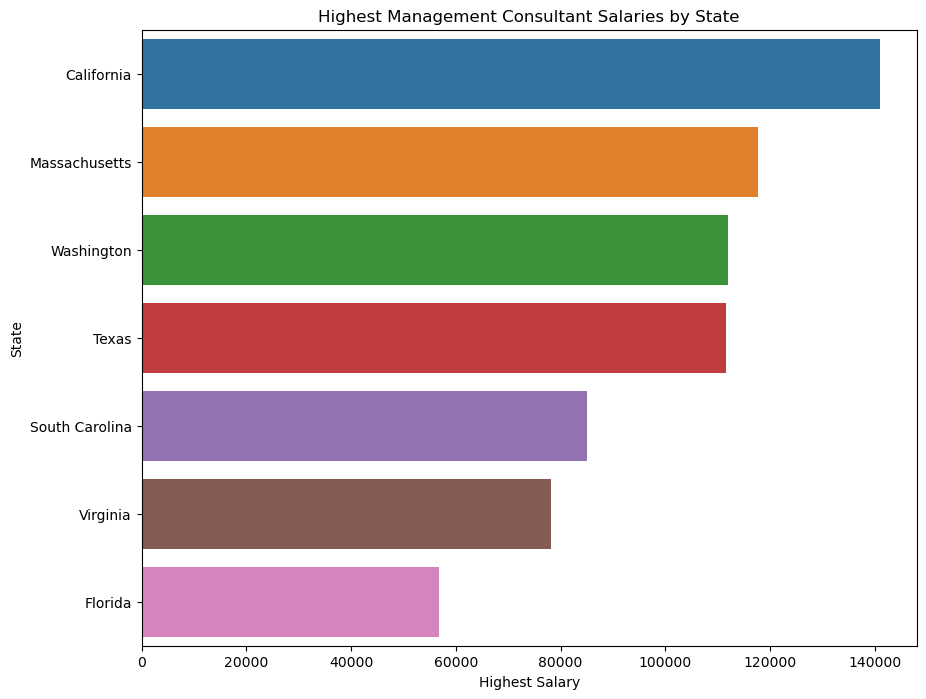

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_management_consultant_salary.values, y=highest_management_consultant_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Management Consultant Salaries by State')
plt.show()

#### Analysis: 

Shifting focus from the education sector to consulting, California reclaims its position as the leading state in terms of remuneration, offering the highest salary of 140,920. Comparing the data for various states, it appears that the demand for consulting positions may not be as pronounced as for software engineers and assistant professors.

### Employer with the Highest Salary for Management Consultant

In [80]:
management_consultant_jobs = salary_data[salary_data['JOB_TITLE'] == 'Management Consultant']

highest_management_consultant_salary_by_employer = management_consultant_jobs.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_management_consultant_salary_by_employer)

EMPLOYER_NAME
DETECON, INC.                    140920.0
FMR LLC                          117600.0
VALUE PRISM CONSULTING           112000.0
NEXIUS INSIGHT, INC              111654.0
COMPASS CHOI USA, INC.           104374.0
QUALITY AIR TOOL REPAIR, INC      85000.0
TAJ CONSTRUCTION INC.             78083.0
REALFOUNDATIONS                   78000.0
ABSTRACTA INC                     56701.0
SEMINAL FINANCIAL GROUP, INC.     51022.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


#### Analysis: 

Furthermore, there appears to be a limited number of companies hiring for management consultant positions. Detecon Inc. offers the highest salary at 140,092, while Seminal Financial Group provides the lowest at $51,022. Although management consultant roles does provide a competitive salaries compared to tech positions, there seems to be a smaller number of available opportunities within the field.

## Teachers 

### States with the Highest Paying Salary for Teachers


In [89]:
teacher= salary_data[salary_data['JOB_TITLE'] == 'Teacher']

highest_teacher_salary =teacher.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_teacher_salary)

WORK_STATE
New Jersey    59057.0
Indiana       46327.0
Arizona       42225.0
Illinois      40330.0
Tennessee     40320.0
California    33072.0
New Mexico    32306.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


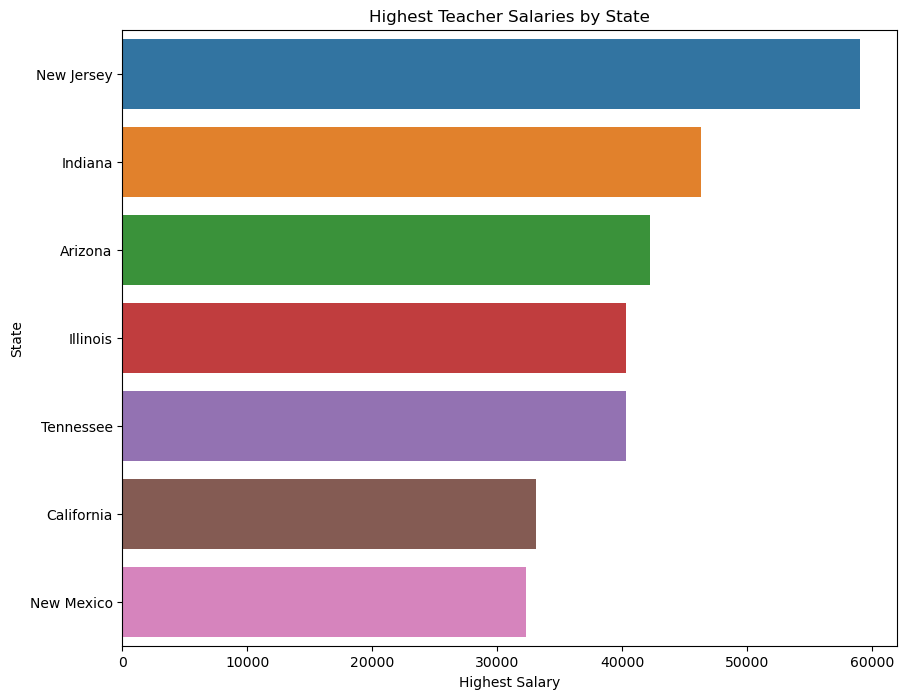

In [90]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_teacher_salary.values, y=highest_teacher_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Teacher Salaries by State')
plt.show()

#### Analysis: 

I notice that a teacher salaries tend to be the lowest among both tech and non-tech related occupations. New Jersey offers the highest salary for this profession, amounting to 59,057, while California ranks second to last, providing a meager 33,072. This finding is particularly surprising, as although California may not be the most expensive state to reside in, the cost of living remains considerably high. Consequently, a maximum salary of approximately 30,000 is strikingly low for the region.

### Employer with the Highest Salary for Teachers

In [33]:
teacher= salary_data[salary_data['JOB_TITLE'] == 'Teacher']

highest_teacher_salary_by_employer =teacher.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_teacher_salary_by_employer)

EMPLOYER_NAME
JAPANESE CHILDREN'S SOCIETY, INC.       59057.0
LUMEN CHRISTI CATHOLIC SCHOOL           46327.0
ROOSEVELT SCHOOL DISTRICT #66           42225.0
CHICAGO FUTABAKAI JAPANESE SCHOOL       40330.0
SUMNER COUNTY BOARD OF EDUCATION        40320.0
CAVE CREEK UNIFIED SCHOOL DISTRICT      39167.0
EDUCATION LINK CORPORATION              33072.0
GALLUP MCKINLEY COUNTY SCHOOLS          32306.0
COOLIDGE UNIFIED SCHOOL DISTRICT #21    31880.0
RIVERSIDE SCHOOL DISTRICT #2            31880.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


#### Analysis: 

The data suggests that teachers with the highest salaries are often employed at private or specialized institutions, such as Japanese Children's Society (salary of 59,057) and Lumen Christi Catholic School (salary of 46,327). Conversely, both Coolidge and Riverside school districts are among the lowest-paying employers, offering a salary of 31,880. This indicates that the type of educational institution significantly influences teachers' salary where we see more private school teachers being paid more compared to those who works for the district which are public.

## Attorney

### States with the Highest Paying Salary for Attorney


In [34]:
attorney= salary_data[salary_data['JOB_TITLE'] == 'Attorney']

highest_attorney_salary =attorney.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_attorney_salary)

WORK_STATE
District of Columbia    160000.0
Texas                   126963.0
California              116376.0
New York                110000.0
Massachusetts            67454.0
Maryland                 65000.0
Florida                  64085.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


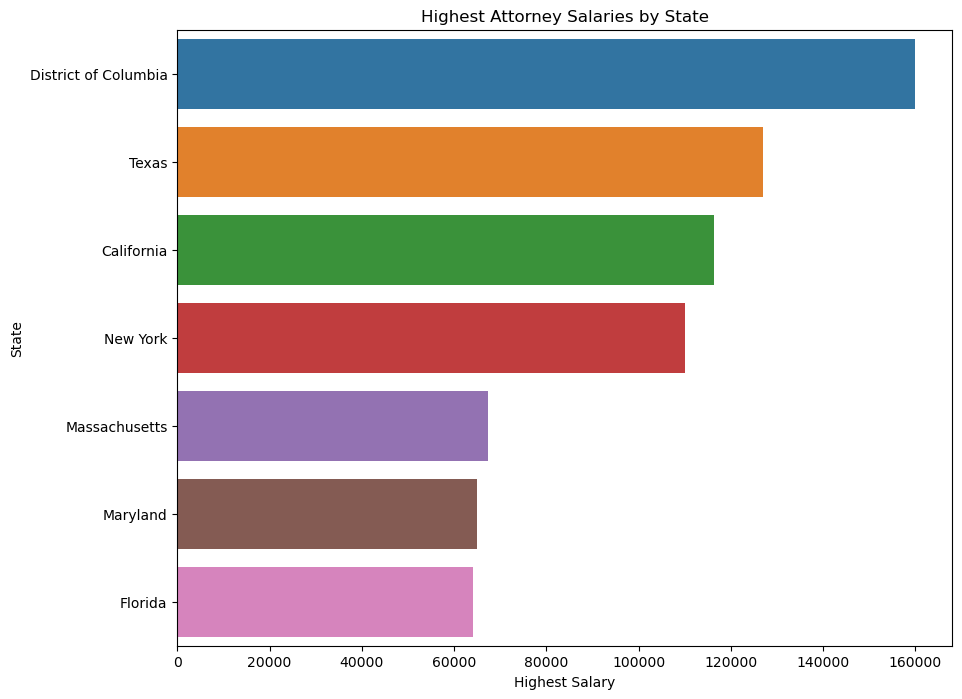

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x=highest_attorney_salary.values, y=highest_attorney_salary.index)
plt.xlabel('Highest Salary')
plt.ylabel('State')
plt.title('Highest Attorney Salaries by State')
plt.show()

#### Analysis: 

For Attorney positions, the District of Columbia offers the highest salary at 160,000, followed by Texas at 126,963. Surprisingly, Florida ranks as the state with the lowest pay, providing a salary of 64,085. Although one might initially assume that New York, with its abundance of companies, would lead in compensation. However it is reasonable for the District of Columbia to offer the highest salaries, given its status as the nation's capital and the presence of numerous government offices.

### Employer with the Highest Salary for Attorney

In [97]:
attorney= salary_data[salary_data['JOB_TITLE'] == 'Attorney']

highest_attorney_salary_by_employer =attorney.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].max().sort_values(ascending=False)
print(highest_attorney_salary_by_employer)

EMPLOYER_NAME
FINNEGAN, HENDERSON, FARABOW, GARRETT & DUNNER LLP    160000.0
PETROCHINA INTERNATIONAL (AMERICA), INC.              126963.0
ESCAMILLA & PONECK, LLP                               126000.0
SAN DIEGO INJURY LAW CENTER                           116376.0
MALLIN & CHA, PC                                      110000.0
Chakalos & Associates, LLC                             67454.0
TRYE BUTLER MAYO GRIFFITH LLC                          65000.0
JMLAW P.A.                                             64085.0
U.S. REGIONAL ECONOMIC DEVELOPMENT AUTHORITY           52957.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


#### Analysis: 

Finnegan, Henderson, Farabow, Garrett & Dunner LLP offers the highest salary among the considered companies. It is surprising to find that the U.S. Regional Economic Development Authority provides the lowest compensation, despite being a government job, which might be expected to offer a more competitive salary. While it would not necessarily pay as much as a private firm, it is unexpected for it to rank at the bottom. This observation highlights that working as an attorney in a governmental role may not be as financially rewarding as working in a private attorney's office.

# Comparing Salary Between Tech and Non - Tech Related Job

### Highest Average Salary between Tech and Non - Tech Related Job

In [115]:
job_titles = ['Data Analyst', 'Business Analyst', 'Software Engineer', 'Data Scientist','Assistant Professor', 'Teacher','Management Consultant','Attorney']
highest_salaries = pd.DataFrame()

# find the highest salary by job
for title in job_titles:
    jobs = salary_data[salary_data['JOB_TITLE'] == title]
    average_salary_by_state = jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean()
    highest_salary = average_salary_by_state.max()
    highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)
    
print(highest_salaries)


               Job Title  Highest Average Salary
0           Data Analyst           116320.000000
1       Business Analyst           119038.000000
2      Software Engineer           118555.000978
3         Data Scientist           119314.272273
4    Assistant Professor           174225.000000
5                Teacher            59057.000000
6  Management Consultant           122647.000000
7               Attorney           160000.000000


/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_98081/102701635.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)
/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_98081/102701635.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)
/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_98081/102701635.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest

/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_43666/3002277794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)
/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_43666/3002277794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)
/var/folders/sh/r7231fhj0yq00p5dk06t9sj80000gn/T/ipykernel_43666/3002277794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest

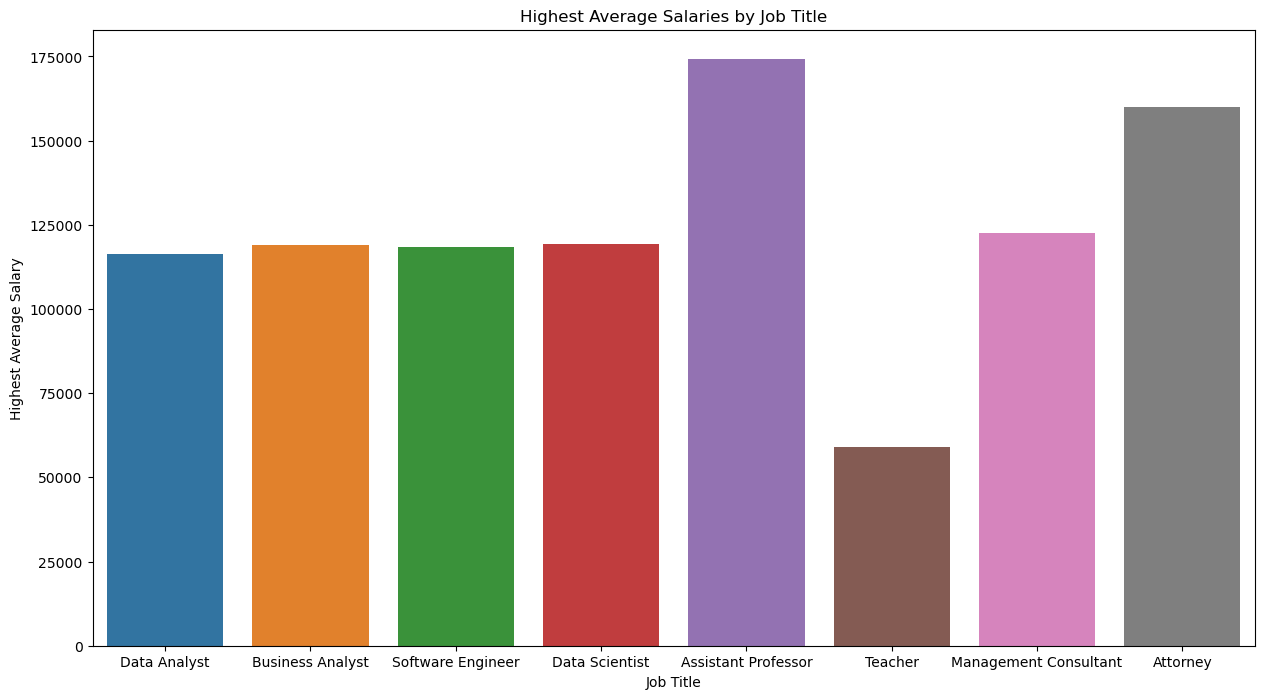

In [37]:
job_titles = ['Data Analyst', 'Business Analyst', 'Software Engineer', 'Data Scientist','Assistant Professor', 'Teacher','Management Consultant','Attorney']
highest_salaries = pd.DataFrame()

# finding highest average salary for each job
for title in job_titles:
    jobs = salary_data[salary_data['JOB_TITLE'] == title]
    average_salary_by_state = jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean()
    highest_salary = average_salary_by_state.max()
    highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)

# Create a bar plot
plt.figure(figsize=(15,8))  # Increase the size of the plot
sns.barplot(x='Job Title', y='Highest Average Salary', data=highest_salaries)
plt.title('Highest Average Salaries by Job Title')
plt.show()


#### Analysis:

In summary, among technology-related positions, a career as a software engineer yields the highest salary, while for non-tech roles, it was assistant professor. Between both tech and non-tech occupations, the assistant professor role offers the highest salary. This analysis suggests that different fields possess unique requirements that influence salary offerings. For instance, an assistant professor's compensation may be determined by factors such as research contributions, years of teaching experience, and academic credentials. In contrast, software engineers, responsible for developing software products, are paid more than data-related roles, which primarily focus on understanding and interpreting data.

In [ ]:
job_titles = ['Data Analyst', 'Business Analyst', 'Software Engineer', 'Data Scientist']
highest_salaries = pd.DataFrame()

# finding highest average salary by city
for title in job_titles:
    jobs = salary_data[salary_data['JOB_TITLE'] == title]
    average_salary_by_city = jobs.groupby('WORK_CITY')['PAID_WAGE_PER_YEAR'].mean()
    highest_salary = average_salary_by_state.max()
    highest_salaries = highest_salaries.append({'Job Title': title, 'Highest Average Salary': highest_salary}, ignore_index=True)

# Create a bar plot
plt.figure(figsize=(15,8))  # Increase the size of the plot
sns.barplot(x='Job Title', y='Highest Average Salary', data=highest_salaries)
plt.title('Highest Average Salaries by Job Title')
plt.show()

### Highest Salary of Each Job by State

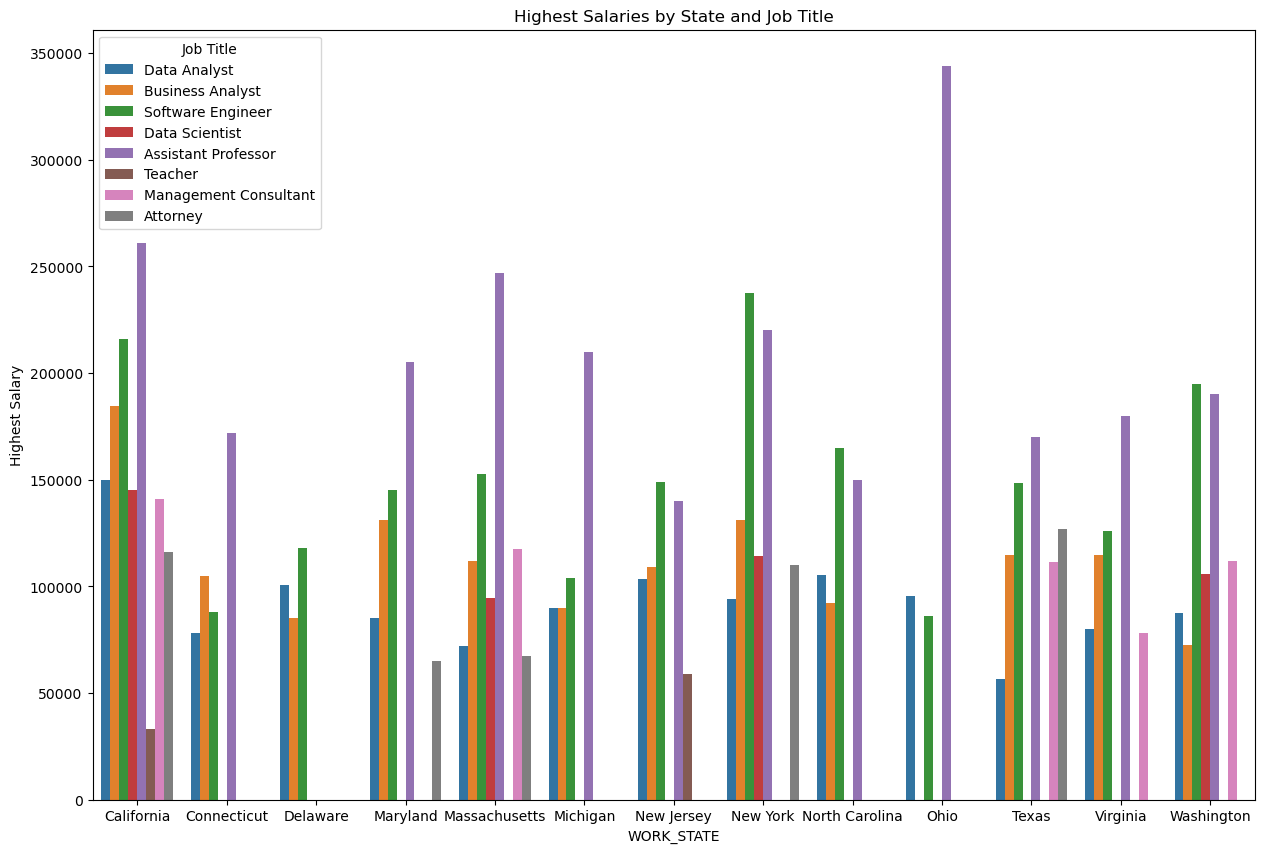

In [40]:

# Define the job titles to compare
job_titles = ['Data Analyst', 'Business Analyst', 'Software Engineer', 'Data Scientist','Assistant Professor', 'Teacher','Management Consultant','Attorney']

highest_salaries = pd.DataFrame()

# find the highest paying salary for each job by state
for title in job_titles:
    jobs = salary_data[salary_data['JOB_TITLE'] == title]
    highest_salary = jobs.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].max()
    highest_salaries[title] = highest_salary

#create a columb for Work_State
highest_salaries.reset_index(inplace=True)

# Create a bar plot
salaries = highest_salaries.melt(id_vars='WORK_STATE', value_vars=job_titles, var_name='Job Title', value_name='Highest Salary')
plt.figure(figsize=(15,10))
sns.barplot(x='WORK_STATE', y='Highest Salary', hue='Job Title', data=salaries)
plt.title('Highest Salaries by State and Job Title')
plt.show()


#### Analysis: 

In general, California offers the highest salaries among the various job roles we examined, as well as a diverse array of employment opportunities based on the different industries present within the state. New York ranks second in this regard, although it falls short in terms of teacher salaries, as it is not the highest-paying state for that particular position. Across the listed states, software engineers and data analysts are among the most prevalent job roles, indicating a greater demand for these positions in the current job market.